In [1]:
from rdkit import Chem, DataStructs
from rdkit.Chem.Pharm2D import Gobbi_Pharm2D
from rdkit.Chem.Pharm2D.Generate import Gen2DFingerprint

import numpy as np

In [3]:
molecules = Chem.SmilesMolSupplier('../data/ligands/molecules.smi',delimiter='\t',titleLine=False)
print(f"{len(molecules)} molecules")

5 molecules


In [4]:
factory = Gobbi_Pharm2D.factory
fps = [Gen2DFingerprint(mol, factory) for mol in molecules]

RDKit WARNING: [10:24:04] WARNING: no name column found on line 0
[10:24:04] WARNING: no name column found on line 0
RDKit WARNING: [10:24:04] WARNING: no name column found on line 1
[10:24:04] WARNING: no name column found on line 1
RDKit WARNING: [10:24:04] WARNING: no name column found on line 2
[10:24:04] WARNING: no name column found on line 2
RDKit WARNING: [10:24:04] WARNING: no name column found on line 3
[10:24:04] WARNING: no name column found on line 3
RDKit WARNING: [10:24:04] WARNING: no name column found on line 4
[10:24:04] WARNING: no name column found on line 4


In [6]:
sim = DataStructs.TanimotoSimilarity(fps[0], fps[1])
print(type(sim))
print(sim)

<class 'float'>
0.8178571428571428


In [7]:
# Compare figerprint for first molcule agains the other fingerpritns
query = fps[0]

print(DataStructs.BulkTanimotoSimilarity(query, fps[1:]))
print(DataStructs.BulkDiceSimilarity(query, fps[1:]))

[0.8178571428571428, 0.8178571428571428, 0.7607142857142857, 0.6839285714285714]
[0.899803536345776, 0.899803536345776, 0.8640973630831643, 0.8123011664899258]


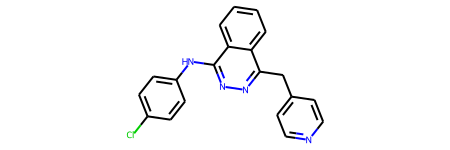

In [8]:
mol = Chem.MolFromSmiles("Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1")
mol

In [10]:
mol_fp = Gen2DFingerprint(mol, factory)
DataStructs.TanimotoSimilarity(query, mol_fp)

0.14054054054054055

In [11]:
type(mol_fp)

rdkit.DataStructs.cDataStructs.SparseBitVect